### 卷积神经网络

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test, y_test) = fashion_mnist.load_data()
x_valid = x_train_all[:5000]
x_train = x_train_all[5000:]
t_valid = y_train_all[:5000]
y_train = y_train_all[5000:]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64).reshape(-1,1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(x_valid.astype(np.float64).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(x_test.astype(np.float64).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10)

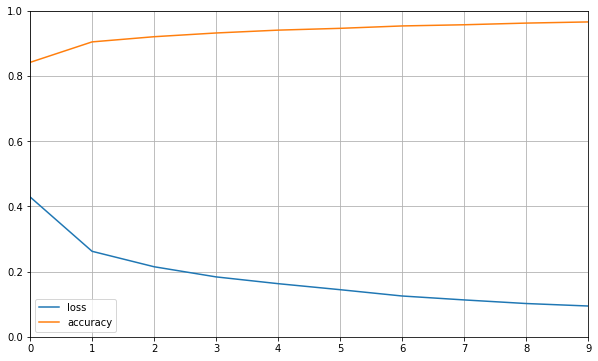

In [6]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
plot_learning_curve(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2802672778636217, 0.9188]

### 深度可分离卷积神经网络
把上面的Conv2D替换成SeparableConv2D即可。